In [1]:
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()


In [2]:
X_train = X_train / 255.0
X_test = X_test / 255.0


In [4]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))
model.save("shiebie_cnn.h5")

Epoch 1/5
1875/1875 [==============================] - 27s 14ms/step - loss: 0.1533 - accuracy: 0.9540 - val_loss: 0.0564 - val_accuracy: 0.9830
Epoch 2/5
1875/1875 [==============================] - 27s 15ms/step - loss: 0.0525 - accuracy: 0.9834 - val_loss: 0.0386 - val_accuracy: 0.9865
Epoch 3/5
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0397 - accuracy: 0.9875 - val_loss: 0.0321 - val_accuracy: 0.9889
Epoch 4/5
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0294 - accuracy: 0.9909 - val_loss: 0.0345 - val_accuracy: 0.9891
Epoch 5/5
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0241 - accuracy: 0.9923 - val_loss: 0.0347 - val_accuracy: 0.9900


Epoch 1/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0194 - accuracy: 0.9939 - val_loss: 0.0426 - val_accuracy: 0.9871
Epoch 2/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0158 - accuracy: 0.9951 - val_loss: 0.0382 - val_accuracy: 0.9876
Epoch 3/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0118 - accuracy: 0.9961 - val_loss: 0.0394 - val_accuracy: 0.9898
Epoch 4/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0110 - accuracy: 0.9965 - val_loss: 0.0320 - val_accuracy: 0.9919
Epoch 5/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0095 - accuracy: 0.9969 - val_loss: 0.0335 - val_accuracy: 0.9912
Epoch 6/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0076 - accuracy: 0.9974 - val_loss: 0.0475 - val_accuracy: 0.9880
Epoch 7/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0065 - accuracy: 0.9976 - val_loss: 0.0405 -

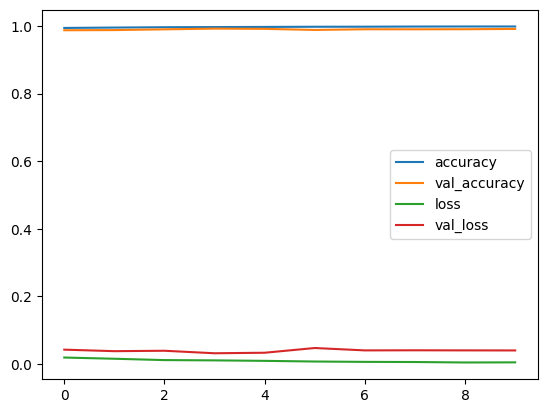

In [5]:
import matplotlib.pyplot as plt

history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')

plt.legend()
plt.show()


In [7]:
model.save("cnn_zuo_tu.h5")

In [3]:
import tensorflow as tf
loaded_model=tf.keras.models.load_model("cnn_zuo_tu.h5")

In [4]:
import cv2
cap = cv2.VideoCapture(0)
while True:
    ret, img = cap.read()
    if ret:
        # 将图像转换为灰度图像并缩放为28x28
        x, y, w, h = 100, 100, 200, 200   # ROI左上角坐标：(x,y)，宽度w，高度h
        cv2.rectangle(img, (x,y), (x+w,y+h), (255,0,0), 3)
        cv2.line(img, (x,y), (x+w,y+h), (255,0,0), 3)
        cv2.line(img, (x+w,y), (x,y+h), (255,0,0), 3)
    
    # 获取ROI区域并进行对应的处理
        roi = img[y:y+h, x:x+w]
        # gray_roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
        
        # 部分图像区域进行识别

        gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
        resized = cv2.resize(gray, (28, 28))

        # 将图像转换为1x28x28的形状并归一化
        normalized = resized.reshape((1, 28, 28)) / 255.0

        # 预测图像所属的数字
        prediction = loaded_model.predict(normalized)
        digit = tf.argmax(prediction, axis=1)[0]

        # 在图像上显示识别结果
        cv2.putText(img, str(digit), (50, 50),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
        cv2.imshow('image', img)

    # 按q键退出
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# 关闭摄像头和窗口
cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 20ms/step


In [1]:
import cv2

capture = cv2.VideoCapture(0)   # 0表示第1个摄像头

while True:
    ret, frame = capture.read()   # 读取一帧摄像头数据
    
    # 检测摄像头是否正常工作
    if not ret:
        print("Failed to capture camera.")
        break
    
    # 在画面上标注要处理的ROI矩形框，并用线把这个区域分隔开来
    x, y, w, h = 100, 100, 200, 200   # ROI左上角坐标：(x,y)，宽度w，高度h
    cv2.rectangle(frame, (x,y), (x+w,y+h), (255,0,0), 3)
    cv2.line(frame, (x,y), (x+w,y+h), (255,0,0), 3)
    cv2.line(frame, (x+w,y), (x,y+h), (255,0,0), 3)
    
    # 获取ROI区域并进行对应的处理
    roi = frame[y:y+h, x:x+w]
    gray_roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
    
    # 显示摄像头画面
    cv2.imshow('camera', frame)
    
    # 按下ESC键退出循环
    if cv2.waitKey(20) == 27:
        break

# 释放capture对象，关闭所有窗口
capture.release()
cv2.destroyAllWindows()


In [12]:
# Import required libraries
import cv2
import numpy as np
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Set up camera
cap = cv2.VideoCapture(0)

# Preprocessing function
def preprocess(img):
  img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  img_resized = cv2.resize(img_gray, (28, 28))
  img_normalized = img_resized / 255
  img_reshaped = img_normalized.reshape((1, 28, 28, 1))
  return img_reshaped

# Load MNIST data and preprocess
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape((60000, 28, 28, 1)) / 255
X_test = X_test.reshape((10000, 28, 28, 1)) / 255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Build CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train CNN model
model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

while True:
  # Capture image from camera
  ret, frame = cap.read()
  
  # Preprocess image
  img = preprocess(frame)
  
  # Use trained model to predict digit
  digit = np.argmax(model.predict(img), axis=-1)
  
  # Display predicted digit on screen
  cv2.putText(frame, str(digit), (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
  cv2.imshow('frame', frame)
  
  if cv2.waitKey(1) == ord('q'):
    break

cap.release()
cv2.destroyAllWindows()


Epoch 1/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2199 - accuracy: 0.9373 - val_loss: 0.0831 - val_accuracy: 0.9756
Epoch 2/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0804 - accuracy: 0.9770 - val_loss: 0.0655 - val_accuracy: 0.9789
Epoch 3/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0603 - accuracy: 0.9823 - val_loss: 0.0557 - val_accuracy: 0.9811
Epoch 4/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0498 - accuracy: 0.9853 - val_loss: 0.0547 - val_accuracy: 0.9827
Epoch 5/5
1/1 [==============================] - 0s 16ms/step
